In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.columns
df.columns = df.columns.str.strip()

In [6]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Preprocessing

In [7]:
df = df.drop(columns=['loan_id', 'commercial_assets_value', 'luxury_assets_value'])

In [8]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,5000000,Rejected


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.470000e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   bank_asset_value          4269 non-null   int64 
 9   loan_status               4269 non-null   object
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


In [12]:
X = df.drop('loan_status', axis=1)  
y = df['loan_status']

In [13]:
y = y.str.strip()
y.unique()

le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,5000000


In [15]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [16]:
categorical_columns = ['education', 'self_employed']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [17]:
X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,8000000,False,False
1,0,4100000,12200000,8,417,2700000,3300000,True,True
2,3,9100000,29700000,20,506,7100000,12800000,False,False
3,3,8200000,30700000,8,467,18200000,7900000,False,False
4,5,9800000,24200000,20,382,12400000,5000000,True,True
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,800000,False,True
4265,0,3300000,11300000,20,559,4200000,1900000,True,True
4266,2,6500000,23900000,18,457,1200000,7300000,True,False
4267,1,4100000,12800000,8,780,8200000,5800000,True,False


In [18]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
X_resampled

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,8000000,False,False
1,0,4100000,12200000,8,417,2700000,3300000,True,True
2,3,9100000,29700000,20,506,7100000,12800000,False,False
3,3,8200000,30700000,8,467,18200000,7900000,False,False
4,5,9800000,24200000,20,382,12400000,5000000,True,True
...,...,...,...,...,...,...,...,...,...
5307,4,7257605,17920706,7,356,6311972,4900000,False,False
5308,1,9392911,28730596,14,501,24569403,6309330,True,True
5309,4,600000,2323523,4,372,23523,223523,False,False
5310,2,8378444,31504592,6,635,869259,6008481,True,True


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [24]:
X_train

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
2778,5,4000000,14100000,18,653,5800000,5400000,True,False
5019,1,9200000,26269560,12,351,5453983,9980618,False,False
567,5,3000000,11100000,12,441,8500000,2000000,False,True
2101,2,2900000,7300000,8,394,7700000,4000000,False,True
3835,1,3400000,9900000,2,736,3900000,4500000,False,False
...,...,...,...,...,...,...,...,...,...
3092,4,8600000,20600000,16,449,10800000,5400000,True,True
3772,2,7000000,21400000,12,541,3700000,9600000,True,True
5191,5,4914815,13792592,13,528,12215740,4676851,True,True
5226,2,3770900,11593649,11,437,964549,3125750,True,False


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train[0]

array([ 1.56318352, -0.38061847, -0.11437762,  1.26532914,  0.4960729 ,
       -0.2650235 ,  0.13746134,  1.09355642, -0.92053859])

In [27]:
# y.replace('Approved': 1, 'Rejected': 0 )
y

array([0, 1, 1, ..., 1, 0, 0])

In [28]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [29]:
results = {}
confidence_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Update pos_label to match your dataset
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    if y_proba is not None:
        confidence_scores[name] = y_proba


C:\Users\iamit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [37]:
test_data = {
    "y_test": y_test,
    "model_predictions": {name: model.predict(X_test) for name, model in models.items()}
}

with open("test_data.pkl", "wb") as f:
    pickle.dump(test_data, f)

In [38]:
test_data

{'y_test': array([0, 0, 0, ..., 0, 0, 0]),
 'model_predictions': {'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1]),
  'Support Vector Machine': array([0, 0, 0, ..., 0, 0, 1]),
  'Gaussian Naive Bayes': array([0, 0, 0, ..., 0, 0, 1]),
  'Random Forest': array([0, 0, 0, ..., 0, 0, 0]),
  'AdaBoost': array([0, 0, 0, ..., 0, 0, 0]),
  'K-Nearest Neighbors': array([0, 0, 0, ..., 1, 0, 1]),
  'Gradient Boosting': array([0, 0, 0, ..., 0, 0, 0])}}

In [39]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.928504,0.929204,0.935829,0.932504
Support Vector Machine,0.947319,0.940663,0.960784,0.950617
Gaussian Naive Bayes,0.950141,0.936426,0.971480,0.953631
Random Forest,0.984008,0.990975,0.978610,0.984753
AdaBoost,0.968956,0.976534,0.964349,0.970404
K-Nearest Neighbors,0.913452,0.899489,0.941176,0.919861
Gradient Boosting,0.977422,0.987296,0.969697,0.978417


In [40]:
predicted_output = models['Logistic Regression'].predict(X_test)
predicted_output[0]

0

In [41]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
# confusion_matrix(y_test, predicted_output)

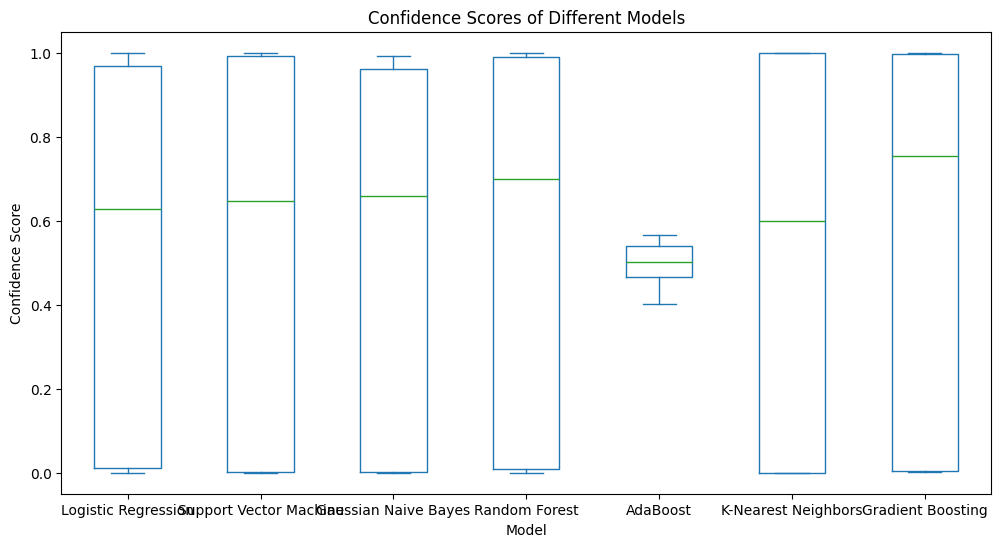

In [43]:
confidence_df = pd.DataFrame(confidence_scores)
confidence_df.plot(kind='box', figsize=(12, 6))
plt.title("Confidence Scores of Different Models")
plt.ylabel("Confidence Score")
plt.xlabel("Model")
plt.show()

C:\Users\iamit\AppData\Local\Temp\ipykernel_8000\3573309159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=confidence_df, x='Model', y='Mean Confidence Score', palette='viridis')


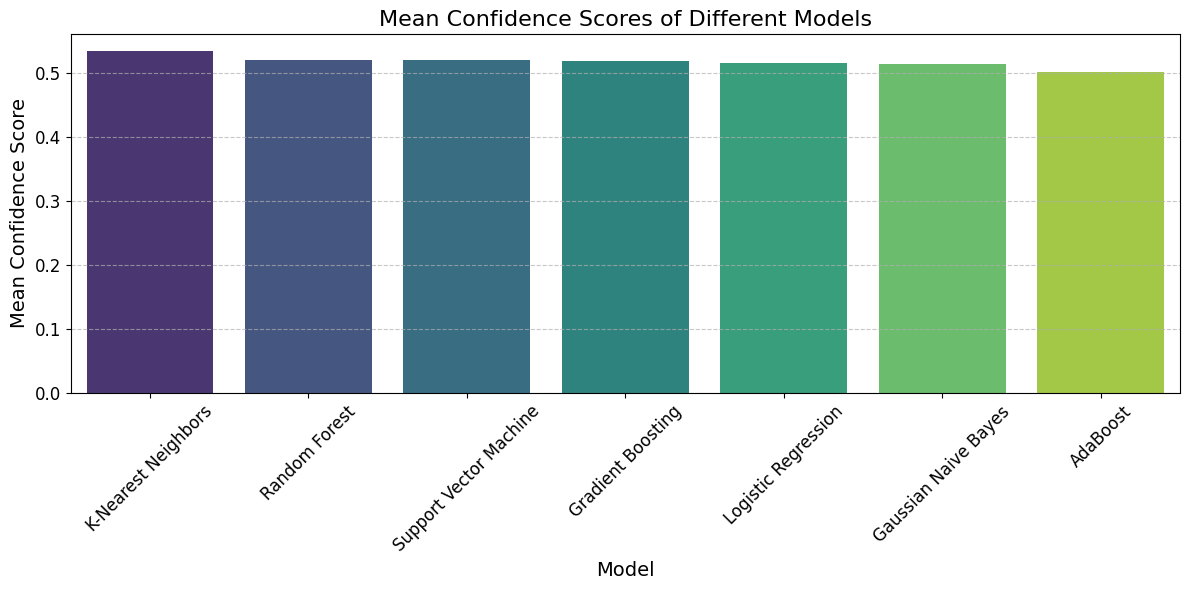

In [44]:
# Calculate mean confidence score for each model
mean_confidence_scores = {model: np.mean(scores) for model, scores in confidence_scores.items()}

# Convert to a DataFrame for easier plotting
confidence_df = pd.DataFrame(list(mean_confidence_scores.items()), columns=['Model', 'Mean Confidence Score'])

# Sort the DataFrame by confidence scores for better visualization
confidence_df = confidence_df.sort_values(by='Mean Confidence Score', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=confidence_df, x='Model', y='Mean Confidence Score', palette='viridis')

# Customize the chart
plt.title("Mean Confidence Scores of Different Models", fontsize=16)
plt.ylabel("Mean Confidence Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


In [45]:
from sklearn.base import BaseEstimator

class MajorityVotingEnsemble(BaseEstimator):
    def __init__(self, models):
        """
        Initialize the ensemble with a dictionary of models.
        :param models: dict, keys are model names, values are trained model objects
        """
        self.models = models

    def predict(self, X):
        """
        Predict the final output based on majority voting.
        :param X: np.ndarray, input features
        :return: np.ndarray, final predictions
        """
        predictions = np.array([model.predict(X) for model in self.models.values()])
        majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return majority_vote

    def predict_proba(self, X):
        """
        Predict confidence scores of all models.
        :param X: np.ndarray, input features
        :return: dict, confidence scores mapped to model names
        """
        confidence_scores = {}
        for name, model in self.models.items():
            if hasattr(model, "predict_proba"):
                confidence_scores[name] = model.predict_proba(X)[:, 1]  # Probability for positive class
            else:
                # Assign 0.5 if the model does not support probability prediction
                confidence_scores[name] = np.full(X.shape[0], 0.5)
        return confidence_scores


In [46]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# Initialize and save the custom ensemble model
ensemble_model = MajorityVotingEnsemble(models=trained_models)

# Save the ensemble model and scaler
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(ensemble_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Ensemble model and scaler saved successfully!")

C:\Users\iamit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ensemble model and scaler saved successfully!


In [47]:
# Assuming X is your feature DataFrame
expected_columns = X.columns.tolist()

# Save the expected columns to a file
with open('expected_columns.pkl', 'wb') as f:
    pickle.dump(expected_columns, f)